<a href="https://colab.research.google.com/github/wcj365/word-count/blob/master/wordcount-python-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Count and Word Cloud 
Using an essay as input file.

Data Source: https://shifter-magazine.com/wp-content/uploads/2015/10/Sontag-Against-Interpretation.pdf

In [0]:
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

TEXT_FILE="against-interpretation.txt"

In [99]:
# First upload the file from your local drive to Colab
# Then, run this command to make sure it is there.

!ls

against-interpretation.txt  sample_data


In [100]:
# Read the file and parse it to great a list of lower-case words
# Some words has "\n", ",", or "." at the end. 
# These extra characters are to be removed.
# Aldo, exclude the words that are considered STOPWORDS

with open(TEXT_FILE, encoding='utf-8', errors='ignore') as file:
    lines = file.readlines()

words = []
for line in lines:
    for word in line.split(" "):
        word = word.strip().rstrip("\n").rstrip(".").rstrip(",").lower()
        if word in STOPWORDS:                  # ignore the STOPWORDS
            continue
        else:
            words.append(word)

words[:10]         # Display the first 10 words


['content',
 'glimpse',
 'something',
 'encounter',
 'flash',
 'tinyvery',
 'tiny',
 'content',
 'william',
 'de']

In [101]:
# Perform word count and dispaly top 10 most frequent words

wordCounts = {}

for word in words:
    if word in wordCounts.keys():   # check if the word is already in the dict
        wordCounts[word] += 1
    else:
        wordCounts[word] = 1        # It is the first occurrence


sorted(wordCounts.items(), key=lambda x: x[1], reverse=True)[:10]

[('art', 71),
 ('interpretation', 42),
 ('content', 28),
 ('work', 24),
 ('form', 17),
 ('works', 14),
 ('theory', 13),
 ('modern', 12),
 ('may', 12),
 ('now', 12)]

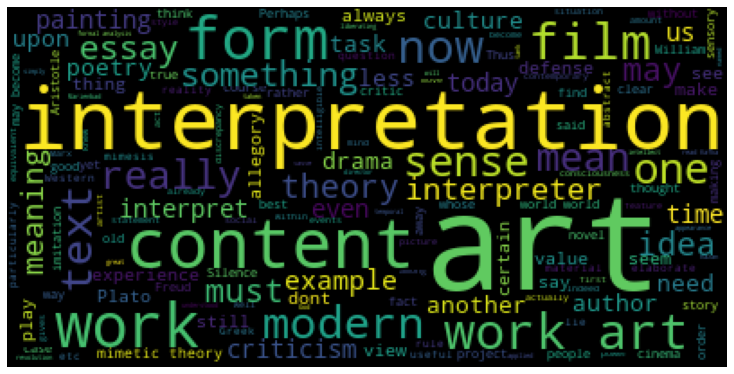

In [103]:
# Generate and plat the word cloud 


wc = WordCloud()

text = "".join(lines)       # combine  list of strings into one single string

wc.generate(text)   

fig = plt.figure(figsize = (10,8))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()